# 서울시 주요 공원 현황

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import folium
import json
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_csv('./data/서울시 주요 공원현황.csv', sep=',', encoding='euc-kr')
df.head(2)

,공원번호,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107,450395.554,126.990377,37.550140,http://parks.seoul.go.kr/template/sub/namsan.do
1,3,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,http://parks.seoul.go.kr/template/common/img/p...,NaN,매주 월요일은 휴관입니다 사전예약 후 입장하실 수 있습니다. ▶ 인터넷 예약 바로가...,http://parks.seoul.go.kr/file/info/view.do?fId...,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,02-489-2770,213554.120,448852.675,127.154779,37.540394,http://parks.seoul.go.kr/template/sub/gildong.do


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   공원번호          132 non-null    int64  
 1   공원명           132 non-null    object 
 2   공원개요          131 non-null    object 
 3   면적            129 non-null    object 
 4   개원일           122 non-null    object 
 5   주요시설          124 non-null    object 
 6   주요식물          88 non-null     object 
 7   안내도           102 non-null    object 
 8   오시는길          115 non-null    object 
 9   이용시참고사항       120 non-null    object 
 10  이미지           132 non-null    object 
 11  지역            131 non-null    object 
 12  공원주소          132 non-null    object 
 13  관리부서          132 non-null    object 
 14  전화번호          132 non-null    object 
 15  X좌표(GRS80TM)  122 non-null    float64
 16  Y좌표(GRS80TM)  122 non-null    float64
 17  X좌표(WGS84)    131 non-null    float64
 18  Y좌표(WGS84)    131 non-null    

In [4]:
del df['공원개요']
del df['개원일']
del df['주요시설']
del df['주요식물']
del df['안내도']
del df['오시는길']
del df['이용시참고사항']
del df['이미지']
del df['관리부서']
del df['전화번호']
del df['X좌표(GRS80TM)']
del df['Y좌표(GRS80TM)']
del df['바로가기']
df.head()

,공원번호,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
0,1,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,3,길동생태공원,80683㎡,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
2,4,서울대공원,9132690m²,과천시,경기도 과천시 대공원광장로 102,127.019847,37.426449
3,5,서울숲,480994㎡,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,6,월드컵공원,2284085㎡,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805


In [5]:
del df['공원번호']
df.head()

,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,길동생태공원,80683㎡,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
2,서울대공원,9132690m²,과천시,경기도 과천시 대공원광장로 102,127.019847,37.426449
3,서울숲,480994㎡,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,월드컵공원,2284085㎡,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805


In [6]:
df.fillna('0', inplace=True)
tmp_list = df['면적'].tolist()
area_list = []
for a in tmp_list:
    area = a.split(maxsplit=1)[0]
    if area == '총':
        area = a.split(maxsplit=1)[1]
    else:
        area = a.split(maxsplit=1)[0]
    area_list.append(area)
print(area_list)

['2896887㎡', '80683㎡', '9132690m²', '480994㎡', '2284085㎡', '8948.1㎡', '휴양', '6456㎥', '80309㎡', '1980.4㎡', '5197.7㎡', '11467㎡', '229539㎡', '15179.7', '16734.60㎥', '61544㎡', '424106㎡', '560552㎡', '26696.8㎥', '75900㎡', '113021.7m2', '201779㎥', '258991㎡', '10420819.08㎡', '171294.1㎥', '15000㎡', '297926㎡', '411972㎡', '98470㎡', '2038741.3㎡', '603715.2㎡', '108120㎡', '29619.3㎥', '29843.8㎡', '126026㎡', '135002.7㎡', '384026㎡', '180000㎥', '416031㎡', '160720㎡', '2277252㎡', '19599.70㎥', '138596㎡', '185295㎥', '254648㎡', '29816.5㎡', '762642㎡', '664905㎡', '99599.9㎡', '5802㎡', '16500㎥ ', '585652㎥', '649709.6㎡', '72132㎡', '66027.8㎡', '265582㎡', '2088704.9㎡', '112070㎡', '993724㎡', '219167㎡', '1349556.4㎡', '1511198㎡', '1097565㎡', '328018㎡', '1447122㎡', '207790㎡', '1018689㎡', '954553㎡', '1667848㎡', '13224㎡', '130345㎡', '5332422㎡', '5107964㎡', '47832㎡', '213552㎡', '168099.87㎡', '359435.2㎡', '36660㎡', '380735㎡', '1807420.9㎡', '359342.8㎡', '632733㎡', '328018㎡', '6691885.3㎡', '285757㎡', '110407㎡', '29682.2㎡', '

In [7]:
area_list[6] = '0'
print(area_list)

['2896887㎡', '80683㎡', '9132690m²', '480994㎡', '2284085㎡', '8948.1㎡', '0', '6456㎥', '80309㎡', '1980.4㎡', '5197.7㎡', '11467㎡', '229539㎡', '15179.7', '16734.60㎥', '61544㎡', '424106㎡', '560552㎡', '26696.8㎥', '75900㎡', '113021.7m2', '201779㎥', '258991㎡', '10420819.08㎡', '171294.1㎥', '15000㎡', '297926㎡', '411972㎡', '98470㎡', '2038741.3㎡', '603715.2㎡', '108120㎡', '29619.3㎥', '29843.8㎡', '126026㎡', '135002.7㎡', '384026㎡', '180000㎥', '416031㎡', '160720㎡', '2277252㎡', '19599.70㎥', '138596㎡', '185295㎥', '254648㎡', '29816.5㎡', '762642㎡', '664905㎡', '99599.9㎡', '5802㎡', '16500㎥ ', '585652㎥', '649709.6㎡', '72132㎡', '66027.8㎡', '265582㎡', '2088704.9㎡', '112070㎡', '993724㎡', '219167㎡', '1349556.4㎡', '1511198㎡', '1097565㎡', '328018㎡', '1447122㎡', '207790㎡', '1018689㎡', '954553㎡', '1667848㎡', '13224㎡', '130345㎡', '5332422㎡', '5107964㎡', '47832㎡', '213552㎡', '168099.87㎡', '359435.2㎡', '36660㎡', '380735㎡', '1807420.9㎡', '359342.8㎡', '632733㎡', '328018㎡', '6691885.3㎡', '285757㎡', '110407㎡', '29682.2㎡', '1

In [8]:
import re
tmp = []
for b in area_list:
    area = re.sub('㎡|m²|m2|㎥', '', b)
    tmp.append(area)
print(tmp)

['2896887', '80683', '9132690', '480994', '2284085', '8948.1', '0', '6456', '80309', '1980.4', '5197.7', '11467', '229539', '15179.7', '16734.60', '61544', '424106', '560552', '26696.8', '75900', '113021.7', '201779', '258991', '10420819.08', '171294.1', '15000', '297926', '411972', '98470', '2038741.3', '603715.2', '108120', '29619.3', '29843.8', '126026', '135002.7', '384026', '180000', '416031', '160720', '2277252', '19599.70', '138596', '185295', '254648', '29816.5', '762642', '664905', '99599.9', '5802', '16500 ', '585652', '649709.6', '72132', '66027.8', '265582', '2088704.9', '112070', '993724', '219167', '1349556.4', '1511198', '1097565', '328018', '1447122', '207790', '1018689', '954553', '1667848', '13224', '130345', '5332422', '5107964', '47832', '213552', '168099.87', '359435.2', '36660', '380735', '1807420.9', '359342.8', '632733', '328018', '6691885.3', '285757', '110407', '29682.2', '137759', '917190', '51470', '662543', '217946', '179666', '34955', '18083', '4835', '196

In [9]:
df = pd.DataFrame({
    '구별': df['지역'],
    '공원명': df['공원명'],
    '공원주소': df['공원주소'],
    '면적': tmp,
    '위도': df['Y좌표(WGS84)'],
    '경도': df['X좌표(WGS84)']
})
df.head()

,구별,공원명,공원주소,면적,위도,경도
0,중구,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),2896887,37.5501,126.99
1,강동구,길동생태공원,서울특별시 강동구 천호대로 1291(길동생태공원),80683,37.5404,127.155
2,과천시,서울대공원,경기도 과천시 대공원광장로 102,9132690,37.4264,127.02
3,성동구,서울숲,서울특별시 성동구 뚝섬로 273 (성수동1가),480994,37.5431,127.042
4,마포구,월드컵공원,서울특별시 마포구 하늘공원로 84(월드컵공원),2284085,37.5718,126.879


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      132 non-null    object
 1   공원명     132 non-null    object
 2   공원주소    132 non-null    object
 3   면적      132 non-null    object
 4   위도      132 non-null    object
 5   경도      132 non-null    object
dtypes: object(6)
memory usage: 6.3+ KB


In [11]:
df = df.astype({
    '면적': float,
    '위도': float,
    '경도': float
    })
df.head(10)

,구별,공원명,공원주소,면적,위도,경도
0,중구,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),2896887.0,37.550140,126.990377
1,강동구,길동생태공원,서울특별시 강동구 천호대로 1291(길동생태공원),80683.0,37.540394,127.154779
2,과천시,서울대공원,경기도 과천시 대공원광장로 102,9132690.0,37.426449,127.019847
3,성동구,서울숲,서울특별시 성동구 뚝섬로 273 (성수동1가),480994.0,37.543072,127.041798
4,마포구,월드컵공원,서울특별시 마포구 하늘공원로 84(월드컵공원),2284085.0,37.571805,126.878907
5,종로구,광화문시민열린마당,서울특별시 종로구 세종로 76-2,8948.1,37.575045,126.978023
6,은평구,진관근린공원(구파발폭포),서울특별시 은평구 진관동 393,0.0,37.637024,126.919216
7,영등포구,중마루근린공원,서울특별시 영등포구 영등포동2가 222,6456.0,37.519832,126.911267
8,성동구,응봉공원,서울특별시 성동구 금호동1가 산1-72,80309.0,37.557228,127.021765
9,강서구,매화근린공원,서울특별시 강서구 등촌동 630-14,1980.4,37.557583,126.861150


### 주소, 위도, 경도 정보 구글맵을 통해 다시 가져오기

In [12]:
import requests
from urllib.parse import urlparse
import pandas as pd 
import googlemaps
from tqdm import tqdm_notebook

In [13]:
key_fd = open('googlemapskey.txt', mode='r')
gmap_key = key_fd.read(100)
key_fd.close()

In [14]:
gmaps = googlemaps.Client(key=gmap_key)
gm = gmaps.geocode('서울대공원', language='ko')
gm

[{'address_components': [{'long_name': '１０２',
    'short_name': '１０２',
    'types': ['premise']},
   {'long_name': '대공원광장로',
    'short_name': '대공원광장로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '문원동',
    'short_name': '문원동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '과천시',
    'short_name': '과천시',
    'types': ['locality', 'political']},
   {'long_name': '경기도',
    'short_name': '경기도',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '427-702',
    'short_name': '427-702',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 경기도 과천시 문원동 대공원광장로 102',
  'geometry': {'location': {'lat': 37.4275247, 'lng': 127.0170252},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.4288736802915,
     'lng': 127.0183741802915},
    'southwest': {'lat': 37.4261757197085, 'lng

In [15]:
gm[0]['formatted_address'], gm[0]['geometry']['location']['lat'], gm[0]['geometry']['location']['lng']

('대한민국 경기도 과천시 문원동 대공원광장로 102', 37.4275247, 127.0170252)

In [16]:
park_name = df['공원명'].tolist()
lat_list = []; lng_list = []; addr_list = []
for name in tqdm_notebook(park_name):
    tmp = gmaps.geocode(name, language='ko')
    if tmp == []:
        addr_list.append(' ')
        lat_list.append(' ')
        lng_list.append(' ')
    else:
        addr_list.append(tmp[0]['formatted_address'])
        tmp_loc = tmp[0]['geometry']['location']
        lat_list.append(tmp_loc['lat'])
        lng_list.append(tmp_loc['lng'])

In [17]:
tmp_df = pd.DataFrame({
    '이름': df['공원명'].tolist(),
    '주소': addr_list,
    'lat': lat_list,
    'lng': lng_list
})
tmp_df.head(10)

,이름,주소,lat,lng
0,남산도시자연공원,,,
1,길동생태공원,대한민국 서울특별시 강동구 길동 산7-3 길동생태공원,37.541,127.156
2,서울대공원,대한민국 경기도 과천시 문원동 대공원광장로 102,37.4275,127.017
3,서울숲,대한민국 서울특별시 성동구 성수동1가 뚝섬로 273 서울숲공원 SEOUL FOREST,37.5444,127.037
4,월드컵공원,대한민국 서울특별시 마포구 성산2동 월드컵로 243-60 월드컵공원,37.5639,126.897
5,광화문시민열린마당,,,
6,진관근린공원(구파발폭포),대한민국 서울특별시 은평구 진관동 진관근린공원,37.6408,126.926
7,중마루근린공원,대한민국 서울특별시 영등포구 영등포동 영등포로53길 22 중마루공원,37.5199,126.911
8,응봉공원,대한민국 서울특별시 성동구 금호동1가 72 응봉공원,37.5572,127.022
9,매화근린공원,,,


#### 공원명으로 구글맵 검색을 했더니 제대로 나오지 않는 공원 수만 25개나 되었습니다.

In [18]:
len(tmp_df[tmp_df['주소'] == ' '])

27

#### 구글맵 검색으로 나온 결과는 쓰고 나오지 않은 공원들은 원래 데이터를 그대로 쓰겠습니다.

In [19]:
addr_list = []; lat_list = []; lng_list = []
for i in df.index:
    if tmp_df['주소'].tolist()[i] != ' ':
        addr_list.append(tmp_df['주소'].tolist()[i])
        lat_list.append(tmp_df['lat'].tolist()[i])
        lng_list.append(tmp_df['lng'].tolist()[i])
    else:
        addr_list.append(df['공원주소'].tolist()[i])
        lat_list.append(df['위도'].tolist()[i])
        lng_list.append(df['경도'].tolist()[i])

In [20]:
df['공원주소'] = addr_list
df['위도'] = lat_list
df['경도'] = lng_list
df.head(10)

,구별,공원명,공원주소,면적,위도,경도
0,중구,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),2896887.0,37.550140,126.990377
1,강동구,길동생태공원,대한민국 서울특별시 강동구 길동 산7-3 길동생태공원,80683.0,37.541021,127.156210
2,과천시,서울대공원,대한민국 경기도 과천시 문원동 대공원광장로 102,9132690.0,37.427525,127.017025
3,성동구,서울숲,대한민국 서울특별시 성동구 성수동1가 뚝섬로 273 서울숲공원 SEOUL FOREST,480994.0,37.544388,127.037442
4,마포구,월드컵공원,대한민국 서울특별시 마포구 성산2동 월드컵로 243-60 월드컵공원,2284085.0,37.563907,126.897317
5,종로구,광화문시민열린마당,서울특별시 종로구 세종로 76-2,8948.1,37.575045,126.978023
6,은평구,진관근린공원(구파발폭포),대한민국 서울특별시 은평구 진관동 진관근린공원,0.0,37.640830,126.925584
7,영등포구,중마루근린공원,대한민국 서울특별시 영등포구 영등포동 영등포로53길 22 중마루공원,6456.0,37.519928,126.911061
8,성동구,응봉공원,대한민국 서울특별시 성동구 금호동1가 72 응봉공원,80309.0,37.557222,127.021667
9,강서구,매화근린공원,서울특별시 강서구 등촌동 630-14,1980.4,37.557583,126.861150


In [21]:
# 위에서 fillna 메서드를 사용해 결측치에 '0'을 넣었기 때문에 이렇게 나왔습니다. 수정하겠습니다.
df[df['구별'] == '0']

,구별,공원명,공원주소,면적,위도,경도
129,0,경춘선숲길,대한민국 서울특별시 노원구 월계2동 276-40 경춘선숲길,211392.0,37.63055,127.063049


In [22]:
df.loc[129, '구별'] = '노원구'
df.tail()

,구별,공원명,공원주소,면적,위도,경도
127,중랑구,용마도시자연공원(사가정공원),대한민국 서울특별시 광진구 중곡동 143-146 용마도시자연공원,109635.0,37.562371,127.096208
128,마포구,문화비축기지,대한민국 서울특별시 마포구 성산동 증산로 87 문화비축기지,140022.0,37.570987,126.894132
129,노원구,경춘선숲길,대한민국 서울특별시 노원구 월계2동 276-40 경춘선숲길,211392.0,37.630550,127.063049
130,강남구,율현공원,대한민국 서울특별시 강남구 율현동 77-9 율현공원,157535.0,37.472379,127.115683
131,중구,서울로7017,대한민국 서울특별시 중구 회현동 퇴계로 18 서울로7017,0.0,37.556507,126.973755


#### 공원주소 앞에 '대한민국' 이 붙은 데이터는 '대한민국' 제거 후 재설정

In [23]:
tmp1_list = df['공원주소'].tolist()
tmp2_list = []
for a in tmp1_list:
    addr = a.split(maxsplit=1)[0]
    if addr == '대한민국':
        addr = a.split(maxsplit=1)[1]
    else:
        addr = a
    tmp2_list.append(addr)
df['공원주소'] = tmp2_list
df.head()

,구별,공원명,공원주소,면적,위도,경도
0,중구,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),2896887.0,37.550140,126.990377
1,강동구,길동생태공원,서울특별시 강동구 길동 산7-3 길동생태공원,80683.0,37.541021,127.156210
2,과천시,서울대공원,경기도 과천시 문원동 대공원광장로 102,9132690.0,37.427525,127.017025
3,성동구,서울숲,서울특별시 성동구 성수동1가 뚝섬로 273 서울숲공원 SEOUL FOREST,480994.0,37.544388,127.037442
4,마포구,월드컵공원,서울특별시 마포구 성산2동 월드컵로 243-60 월드컵공원,2284085.0,37.563907,126.897317


#### 공원주소를 바탕으로 지역이 서울특별시가 아닌 행 제거

In [24]:
# 지역이 서울특별시가 아닌 행 제거
addr_list = df['공원주소'].tolist()
for i, addr in enumerate(addr_list):
    region = addr.split(maxsplit=1)[0]
    if region != '서울특별시':
        df.drop(i, inplace=True)

df.reset_index(drop=True, inplace=True)
df.head()

,구별,공원명,공원주소,면적,위도,경도
0,중구,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),2896887.0,37.550140,126.990377
1,강동구,길동생태공원,서울특별시 강동구 길동 산7-3 길동생태공원,80683.0,37.541021,127.156210
2,성동구,서울숲,서울특별시 성동구 성수동1가 뚝섬로 273 서울숲공원 SEOUL FOREST,480994.0,37.544388,127.037442
3,마포구,월드컵공원,서울특별시 마포구 성산2동 월드컵로 243-60 월드컵공원,2284085.0,37.563907,126.897317
4,종로구,광화문시민열린마당,서울특별시 종로구 세종로 76-2,8948.1,37.575045,126.978023


#### 과천시 행 제거

In [25]:
df.drop(2, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,구별,공원명,공원주소,면적,위도,경도
0,중구,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),2896887.0,37.550140,126.990377
1,강동구,길동생태공원,서울특별시 강동구 길동 산7-3 길동생태공원,80683.0,37.541021,127.156210
2,마포구,월드컵공원,서울특별시 마포구 성산2동 월드컵로 243-60 월드컵공원,2284085.0,37.563907,126.897317
3,종로구,광화문시민열린마당,서울특별시 종로구 세종로 76-2,8948.1,37.575045,126.978023
4,은평구,진관근린공원(구파발폭포),서울특별시 은평구 진관동 진관근린공원,0.0,37.640830,126.925584


In [26]:
df.head(10)

,구별,공원명,공원주소,면적,위도,경도
0,중구,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),2896887.0,37.550140,126.990377
1,강동구,길동생태공원,서울특별시 강동구 길동 산7-3 길동생태공원,80683.0,37.541021,127.156210
2,마포구,월드컵공원,서울특별시 마포구 성산2동 월드컵로 243-60 월드컵공원,2284085.0,37.563907,126.897317
3,종로구,광화문시민열린마당,서울특별시 종로구 세종로 76-2,8948.1,37.575045,126.978023
4,은평구,진관근린공원(구파발폭포),서울특별시 은평구 진관동 진관근린공원,0.0,37.640830,126.925584
5,영등포구,중마루근린공원,서울특별시 영등포구 영등포동 영등포로53길 22 중마루공원,6456.0,37.519928,126.911061
6,성동구,응봉공원,서울특별시 성동구 금호동1가 72 응봉공원,80309.0,37.557222,127.021667
7,강서구,매화근린공원,서울특별시 강서구 등촌동 630-14,1980.4,37.557583,126.861150
8,성동구,성수근린공원,서울특별시 성동구 성수동2가 302-25 성수근린공원,5197.7,37.544733,127.052407
9,강동구,샛마을근린공원,서울특별시 강동구 명일동 288 샛마을근린공원,11467.0,37.549790,127.147565


In [27]:
df[df['공원명'] == '금천폭포근린공원']

,구별,공원명,공원주소,면적,위도,경도
92,금천구,금천폭포근린공원,서울특별시 금천구 시흥동 금천폭포공원,4835.0,37.446687,126.904147


In [28]:
df.to_csv('../input/Seoul/park_result.csv', sep=',', encoding='utf8')

### 위도, 경도 정보를 바탕으로 지도 위에 표시하기

In [29]:
geo_path = '../input/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [30]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5)

for i in df.index:
    folium.Marker(
        location=[df['위도'][i], df['경도'][i]],
        popup=df['면적'][i], 
        tooltip=f"{df['구별'][i]} - {df['공원명'][i]}"
    ).add_to(map)
title_html = '<h3 align="center" style="font-size: 20px"><b>자치구별 공원들의 위치</b></h3>'
map.get_root().html.add_child(folium.Element(title_html))
map

In [31]:
sum_area = df.groupby(['구별'])[['면적']].sum()
sum_area.rename(columns={'면적': '총 면적'}, inplace=True)
sum_area.sort_values('총 면적', ascending=False).head()

,총 면적
구별,
노원구,12235699.30
관악구,10431453.08
서초구,9667181.00
중랑구,7078975.00
종로구,3907680.57


In [32]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5)

map.choropleth(geo_data=geo_str,
                data=sum_area['총 면적'],
                columns=[sum_area.index, sum_area['총 면적']],
                fill_color='PuRd',
                key_on='feature.id')

for i in df.index:
    folium.Marker(
        location=[df['위도'][i], df['경도'][i]],
        popup=df['면적'][i], 
        tooltip=f"{df['구별'][i]} - {df['공원명'][i]}"
    ).add_to(map)
title_html = '<h3 align="center" style="font-size: 20px"><b>자치구별 공원들의 위치와 면적의 총합</b></h3>'
map.get_root().html.add_child(folium.Element(title_html))
map

#### 노원구, 관악구, 서초구 순으로 면적의 총합이 가장 컸습니다.

In [33]:
count_park = df.groupby(['구별'])[['공원명']].count()
count_park.rename(columns={'공원명': '공원수'}, inplace=True)
count_park.sort_values('공원수', ascending=False).head(10)

,공원수
구별,
종로구,12
강서구,9
강남구,7
은평구,7
강동구,7
동작구,7
도봉구,6
송파구,6
중랑구,6


In [34]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5)

map.choropleth(geo_data=geo_str,
                data=count_park['공원수'],
                columns=[count_park.index, count_park['공원수']],
                fill_color='PuRd',
                key_on='feature.id')

for i in df.index:
    folium.Marker(
        location=[df['위도'][i], df['경도'][i]],
        popup=df['면적'][i], 
        tooltip=f"{df['구별'][i]} - {df['공원명'][i]}"
    ).add_to(map)
title_html = '<h3 align="center" style="font-size: 20px"><b>자치구별 공원들의 위치와 공원의 수</b></h3>'
map.get_root().html.add_child(folium.Element(title_html))
map

#### 공원의 수는 종로구가 12개로 가장 많고, 강서구가 9개였으며, 강남, 은평, 강동, 동작이 7개로 그 뒤를 이었습니다.

### 인구수, 구 면적 정보를 가져오기 위해 파일 읽어오기

In [35]:
cctv_result = pd.read_csv('../input/Seoul/cctv_result.csv', encoding='utf-8')
cctv_result.head()

,구별,cctv소계,cctv최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [36]:
area_seoul = pd.read_csv('./data/서울시 자치구 행정구역, 면적 통계(2019).tsv', sep='\t', thousands=',', encoding='utf-8', header=1)
area_seoul.head()

,기간,자치구,면적,구성비(%),행정,법정,통,반
0,2019,서울시,605.24,100.0,424,467,12713,94152
1,2019,종로구,23.91,4.0,17,87,278,1479
2,2019,중구,9.96,1.6,15,74,253,1580
3,2019,용산구,21.87,3.6,16,36,351,2550
4,2019,성동구,16.86,2.8,17,17,466,3619


In [37]:
area_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      26 non-null     int64  
 1   자치구     26 non-null     object 
 2   면적      26 non-null     float64
 3   구성비(%)  26 non-null     float64
 4   행정      26 non-null     int64  
 5   법정      26 non-null     int64  
 6   통       26 non-null     int64  
 7   반       26 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.8+ KB


In [38]:
del area_seoul['기간']
del area_seoul['행정']
del area_seoul['법정']
del area_seoul['통']
del area_seoul['반']
area_seoul.drop([0], inplace=True)
area_seoul.rename({'자치구': '구별'}, inplace=True, axis=1)
area_seoul.head()

,구별,면적,구성비(%)
1,종로구,23.91,4.0
2,중구,9.96,1.6
3,용산구,21.87,3.6
4,성동구,16.86,2.8
5,광진구,17.06,2.8


In [39]:
# 초기에 km² 로 되어있던 면적의 단위를 m² 로 변환 
area_seoul['면적'] = area_seoul['면적'] * 1000000
area_seoul.head()

,구별,면적,구성비(%)
1,종로구,23910000.0,4.0
2,중구,9960000.0,1.6
3,용산구,21870000.0,3.6
4,성동구,16860000.0,2.8
5,광진구,17060000.0,2.8


In [40]:
df.head()

,구별,공원명,공원주소,면적,위도,경도
0,중구,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),2896887.0,37.550140,126.990377
1,강동구,길동생태공원,서울특별시 강동구 길동 산7-3 길동생태공원,80683.0,37.541021,127.156210
2,마포구,월드컵공원,서울특별시 마포구 성산2동 월드컵로 243-60 월드컵공원,2284085.0,37.563907,126.897317
3,종로구,광화문시민열린마당,서울특별시 종로구 세종로 76-2,8948.1,37.575045,126.978023
4,은평구,진관근린공원(구파발폭포),서울특별시 은평구 진관동 진관근린공원,0.0,37.640830,126.925584


In [41]:
df.sort_values('면적').head()

,구별,공원명,공원주소,면적,위도,경도
126,중구,서울로7017,서울특별시 중구 회현동 퇴계로 18 서울로7017,0.0,37.556507,126.973755
4,은평구,진관근린공원(구파발폭포),서울특별시 은평구 진관동 진관근린공원,0.0,37.640830,126.925584
105,구로구,푸른수목원,서울특별시 구로구 항동 96-4 푸른수목원,0.0,37.483984,126.825594
114,중구,문화역 서울284,서울특별시 중구 봉래동2가 통일로 1,0.0,37.555835,126.971732
7,강서구,매화근린공원,서울특별시 강서구 등촌동 630-14,1980.4,37.557583,126.861150


In [42]:
df[df['면적'] == 0]

,구별,공원명,공원주소,면적,위도,경도
4,은평구,진관근린공원(구파발폭포),서울특별시 은평구 진관동 진관근린공원,0.0,37.640830,126.925584
105,구로구,푸른수목원,서울특별시 구로구 항동 96-4 푸른수목원,0.0,37.483984,126.825594
114,중구,문화역 서울284,서울특별시 중구 봉래동2가 통일로 1,0.0,37.555835,126.971732
126,중구,서울로7017,서울특별시 중구 회현동 퇴계로 18 서울로7017,0.0,37.556507,126.973755


In [43]:
df.loc[4, '면적'] = 983.791
df.loc[105, '면적'] = 103354
df.loc[114, '면적'] = 2964.6
df.loc[126, '면적'] = 22826
df.head()

,구별,공원명,공원주소,면적,위도,경도
0,중구,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),2896887.000,37.550140,126.990377
1,강동구,길동생태공원,서울특별시 강동구 길동 산7-3 길동생태공원,80683.000,37.541021,127.156210
2,마포구,월드컵공원,서울특별시 마포구 성산2동 월드컵로 243-60 월드컵공원,2284085.000,37.563907,126.897317
3,종로구,광화문시민열린마당,서울특별시 종로구 세종로 76-2,8948.100,37.575045,126.978023
4,은평구,진관근린공원(구파발폭포),서울특별시 은평구 진관동 진관근린공원,983.791,37.640830,126.925584


In [44]:
df2 = pd.DataFrame({
    '구별': area_seoul['구별'],
    '구면적': area_seoul['면적']
})
df2.head()

,구별,구면적
1,종로구,23910000.0
2,중구,9960000.0
3,용산구,21870000.0
4,성동구,16860000.0
5,광진구,17060000.0


In [45]:
df3 = pd.DataFrame({
    '구별': cctv_result['구별'],
    '인구수': cctv_result['인구수']
})
df3.head()

,구별,인구수
0,강남구,544085
1,강동구,462275
2,강북구,313550
3,강서구,589536
4,관악구,514555


In [46]:
park = pd.merge(df, df2, on='구별')
park.head()

,구별,공원명,공원주소,면적,위도,경도,구면적
0,중구,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),2896887.0,37.550140,126.990377,9960000.0
1,중구,훈련원근린공원,서울특별시 을지로동 서울특별시 중구 을지로 227 (을지로5가) 훈련원공원,16734.6,37.567341,127.003772,9960000.0
2,중구,손기정체육공원,서울특별시 중구 중림동 손기정로 101 손기정 체육공원,29682.2,37.555286,126.964666,9960000.0
3,중구,문화역 서울284,서울특별시 중구 봉래동2가 통일로 1,2964.6,37.555835,126.971732,9960000.0
4,중구,서울로7017,서울특별시 중구 회현동 퇴계로 18 서울로7017,22826.0,37.556507,126.973755,9960000.0


In [47]:
park = pd.merge(park, df3, on='구별')
park.head()

,구별,공원명,공원주소,면적,위도,경도,구면적,인구수
0,중구,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),2896887.0,37.550140,126.990377,9960000.0,135321
1,중구,훈련원근린공원,서울특별시 을지로동 서울특별시 중구 을지로 227 (을지로5가) 훈련원공원,16734.6,37.567341,127.003772,9960000.0,135321
2,중구,손기정체육공원,서울특별시 중구 중림동 손기정로 101 손기정 체육공원,29682.2,37.555286,126.964666,9960000.0,135321
3,중구,문화역 서울284,서울특별시 중구 봉래동2가 통일로 1,2964.6,37.555835,126.971732,9960000.0,135321
4,중구,서울로7017,서울특별시 중구 회현동 퇴계로 18 서울로7017,22826.0,37.556507,126.973755,9960000.0,135321


In [48]:
park.rename({'면적': '공원면적'}, inplace=True, axis=1)
park.head()

,구별,공원명,공원주소,공원면적,위도,경도,구면적,인구수
0,중구,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),2896887.0,37.550140,126.990377,9960000.0,135321
1,중구,훈련원근린공원,서울특별시 을지로동 서울특별시 중구 을지로 227 (을지로5가) 훈련원공원,16734.6,37.567341,127.003772,9960000.0,135321
2,중구,손기정체육공원,서울특별시 중구 중림동 손기정로 101 손기정 체육공원,29682.2,37.555286,126.964666,9960000.0,135321
3,중구,문화역 서울284,서울특별시 중구 봉래동2가 통일로 1,2964.6,37.555835,126.971732,9960000.0,135321
4,중구,서울로7017,서울특별시 중구 회현동 퇴계로 18 서울로7017,22826.0,37.556507,126.973755,9960000.0,135321


In [49]:
park = park[['구별', '구면적', '공원명', '공원면적', '공원주소', '위도', '경도', '인구수']]
park.head()

,구별,구면적,공원명,공원면적,공원주소,위도,경도,인구수
0,중구,9960000.0,남산도시자연공원,2896887.0,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377,135321
1,중구,9960000.0,훈련원근린공원,16734.6,서울특별시 을지로동 서울특별시 중구 을지로 227 (을지로5가) 훈련원공원,37.567341,127.003772,135321
2,중구,9960000.0,손기정체육공원,29682.2,서울특별시 중구 중림동 손기정로 101 손기정 체육공원,37.555286,126.964666,135321
3,중구,9960000.0,문화역 서울284,2964.6,서울특별시 중구 봉래동2가 통일로 1,37.555835,126.971732,135321
4,중구,9960000.0,서울로7017,22826.0,서울특별시 중구 회현동 퇴계로 18 서울로7017,37.556507,126.973755,135321


In [50]:
park.to_csv('../input/Seoul/park_result2.csv', sep=',', encoding='utf8')

### 인구수와 공원, 구면적과 공원의 상관관계

In [51]:
pop_park = cctv_result[['구별','인구수']]
pop_park.head()

,구별,인구수
0,강남구,544085
1,강동구,462275
2,강북구,313550
3,강서구,589536
4,관악구,514555


In [52]:
park1 = pd.merge(pop_park, df2, on='구별')
park1 = pd.merge(park1, count_park, on='구별')
park1 = pd.merge(park1, sum_area, on='구별')
park1.rename({'총 면적': '공원총면적'}, axis=1, inplace=True)
park1.set_index('구별', inplace=True)
park1.head()

,인구수,구면적,공원수,공원총면적
구별,,,,
강남구,544085,39500000.0,7,3626398.50
강동구,462275,24590000.0,7,1526389.30
강북구,313550,23600000.0,4,3714902.40
강서구,589536,41440000.0,9,2194154.10
관악구,514555,29570000.0,2,10431453.08


In [53]:
fp1 = np.polyfit(park1['인구수'], park1['공원수'], 1)
fp1

array([8.35932520e-07, 4.74719824e+00])

In [54]:
f1 = np.poly1d(fp1)
fx = np.arange(100000, 700000)
fy = f1(fx)

In [55]:
park1['공원수-인구수 오차'] = np.abs(park1['공원수'] - f1(park1['인구수']))
park1_sort = park1.sort_values('공원수-인구수 오차', ascending=False)
park1_sort.head()

,인구수,구면적,공원수,공원총면적,공원수-인구수 오차
구별,,,,,
종로구,159842,23910000.0,12,3907680.57,7.119185
강서구,589536,41440000.0,9,2194154.10,3.759989
관악구,514555,29570000.0,2,10431453.08,3.177332
광진구,361923,17060000.0,2,584002.00,3.049741
용산구,244953,21870000.0,2,247194.10,2.951962


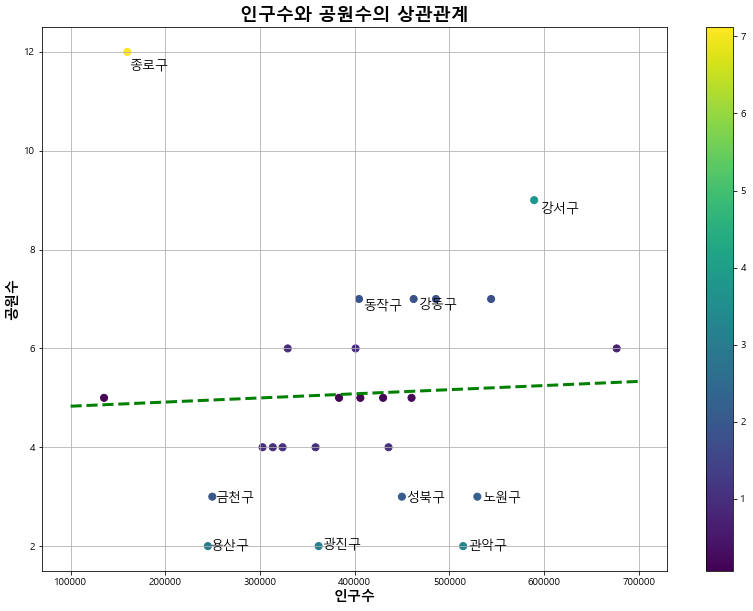

In [56]:
plt.figure(figsize=(14,10))
plt.scatter(park1['인구수'], park1['공원수'], c=park1['공원수-인구수 오차'], s=50)
for i in range(10): 
    plt.text(park1_sort['인구수'][i]*1.01, park1_sort['공원수'][i]*0.97,
             park1_sort.index[i], fontsize=13)
plt.plot(fx,fy,ls='dashed', lw=3, color='g')
plt.grid(True)
plt.title('인구수와 공원수의 상관관계', size=18, weight='bold')
plt.xlabel('인구수', size=14, weight='bold')
plt.ylabel('공원수', size=14, weight='bold')
plt.colorbar(); plt.show()

#### 인구수 대비 공원수가 종로구가 가장 많고, 노원구나 관악구는 인구수에 비해 공원수가 현저히 적은 것을 볼 수 있습니다.

In [57]:
park2 = park1.copy()
del park2['공원수-인구수 오차']
park2.head()

,인구수,구면적,공원수,공원총면적
구별,,,,
강남구,544085,39500000.0,7,3626398.50
강동구,462275,24590000.0,7,1526389.30
강북구,313550,23600000.0,4,3714902.40
강서구,589536,41440000.0,9,2194154.10
관악구,514555,29570000.0,2,10431453.08


In [58]:
fp1 = np.polyfit(park1['구면적'], park1['공원총면적'], 1)
fp1

array([ 1.83792925e-01, -1.26365523e+06])

In [59]:
f1 = np.poly1d(fp1)
fx = np.arange(10000000, 50000000)
fy = f1(fx)

In [60]:
park1['공원면적-구면적 오차'] = np.abs(park1['공원총면적'] - f1(park1['구면적']))
park1_sort = park1.sort_values('공원면적-구면적 오차', ascending=False)
park1_sort.head()

,인구수,구면적,공원수,공원총면적,공원수-인구수 오차,공원면적-구면적 오차
구별,,,,,,
노원구,529532,35440000.0,3,12235699.30,2.189851,6.985733e+06
관악구,514555,29570000.0,2,10431453.08,3.177332,6.260352e+06
중랑구,400989,18500000.0,6,7078975.00,0.917602,4.942461e+06
강서구,589536,41440000.0,9,2194154.10,3.759989,4.158569e+06
영등포구,405982,24550000.0,5,424446.00,0.086572,2.824015e+06


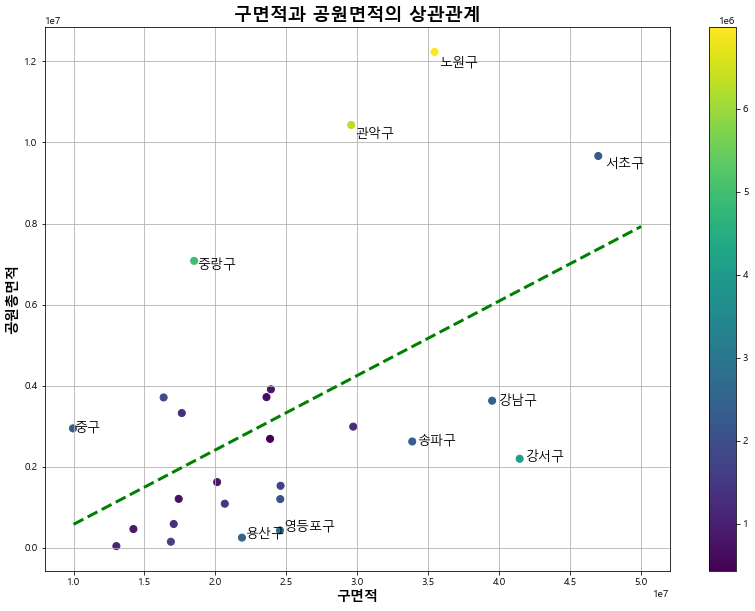

In [61]:
plt.figure(figsize=(14,10))
plt.scatter(park1['구면적'], park1['공원총면적'], c=park1['공원면적-구면적 오차'], s=50)
for i in range(10): 
    plt.text(park1_sort['구면적'][i]*1.01, park1_sort['공원총면적'][i]*0.97,
             park1_sort.index[i], fontsize=13)
plt.plot(fx,fy,ls='dashed', lw=3, color='g')
plt.grid(True)
plt.title('구면적과 공원면적의 상관관계', size=18, weight='bold')
plt.xlabel('구면적', size=14, weight='bold')
plt.ylabel('공원총면적', size=14, weight='bold')
plt.colorbar(); plt.show()

#### 노원, 관악, 중랑구는 구면적에 비해 공원의 총 면적이 큰 편이고, 강서, 강남, 송파구는 작은 편이다.

### 인구 대비 공원 면적

In [100]:
park_to_pop = park.copy()
park_to_pop.head(3)

,구별,구면적,공원명,공원면적,공원주소,위도,경도,인구수
0,중구,9960000.0,남산도시자연공원,2896887.0,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377,135321
1,중구,9960000.0,훈련원근린공원,16734.6,서울특별시 을지로동 서울특별시 중구 을지로 227 (을지로5가) 훈련원공원,37.567341,127.003772,135321
2,중구,9960000.0,손기정체육공원,29682.2,서울특별시 중구 중림동 손기정로 101 손기정 체육공원,37.555286,126.964666,135321


In [101]:
park_to_pop['인당공원면적'] = park_to_pop['공원면적'] / park_to_pop['인구수']
park_to_pop.tail(3)

,구별,구면적,공원명,공원면적,공원주소,위도,경도,인구수,인당공원면적
124,노원구,35440000.0,불암산도시자연공원,5332422.0,서울특별시 노원구 상계동 불암산도시자연공원,37.664497,127.082429,529532,10.070066
125,노원구,35440000.0,수락산도시자연공원,6691885.3,서울특별시 노원구 상계동 수락산자연공원,37.675801,127.080901,529532,12.637358
126,노원구,35440000.0,경춘선숲길,211392.0,서울특별시 노원구 월계2동 276-40 경춘선숲길,37.630550,127.063049,529532,0.399205


In [104]:
# 구별로 그룹화하여 인당공원면적의 평균을 구함
pta = park_to_pop.groupby('구별')[['인당공원면적']].mean()
pta

,인당공원면적
구별,
강남구,0.952162
강동구,0.471701
강북구,2.961970
강서구,0.413537
관악구,10.136383
광진구,0.806804
구로구,0.987382
금천구,0.050630
노원구,7.702210


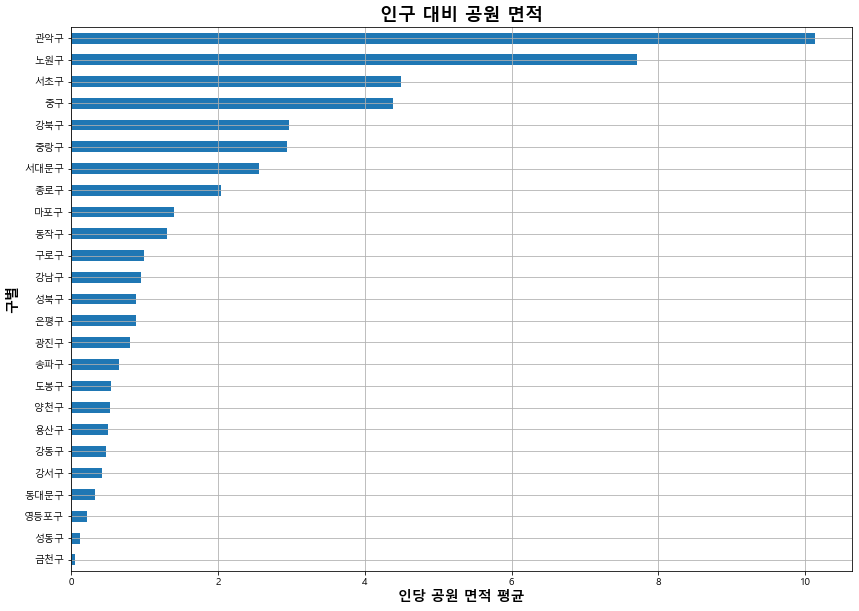

In [107]:
plt.figure(figsize=(14, 10))
pta['인당공원면적'].sort_values().plot(kind='barh')
plt.grid()
plt.xlabel('인당 공원 면적 평균', size=14, weight='bold')
plt.ylabel('구별', size=14, weight='bold')
plt.title('인구 대비 공원 면적', size=18, weight='bold')
plt.show()

#### 인구 대비 공원 면적은 관악구, 노원구, 서초구 순서였습니다.

In [90]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')
for i in park.index:
    folium.CircleMarker(
        location=[park['위도'][i], park['경도'][i]], 
        tooltip=park['공원명'][i], 
        radius= park['공원면적'][i]*0.0000035,
        color='magenta', 
        fill_color='magenta'
    ).add_to(map)


title_html = '<h3 align="center" style="font-size:20px"><b>서울시 모든 공원 크기별로 표시</b></h3>'
map.get_root().html.add_child(folium.Element(title_html))                      
map

### 강서구 공원 표시하기

In [89]:
park[park['구별'] == '강서구']

,구별,구면적,공원명,공원면적,공원주소,위도,경도,인구수
45,강서구,41440000.0,매화근린공원,1980.4,서울특별시 강서구 등촌동 630-14,37.557583,126.861150,589536
46,강서구,41440000.0,허준공원,29843.8,서울특별시 강서구 가양동 1471 허준근린공원,37.567616,126.852937,589536
47,강서구,41440000.0,궁산근린공원,135002.7,서울특별시 강서구 가양동 8-4 궁산근린공원,37.574167,126.839444,589536
48,강서구,41440000.0,꿩고개근린공원,180000.0,서울특별시 강서구 방화동 꿩고개근린공원,37.580002,126.815763,589536
49,강서구,41440000.0,방화근린공원,72132.0,서울특별시 강서구 방화동,37.580965,126.813816,589536
50,강서구,41440000.0,염창근린공원,112070.0,서울특별시 강서구 염창동 염창공원,37.557978,126.867508,589536
51,강서구,41440000.0,우장산근린공원,359435.2,서울특별시 강서구 화곡동 화곡로 302 우장근린공원,37.550838,126.849812,589536
52,강서구,41440000.0,봉제산공원,917190.0,서울특별시 강서구 화곡동 봉제산공원 둘레길,37.542175,126.854704,589536
53,강서구,41440000.0,개화근린공원,386500.0,서울특별시 강서구 개화동 산17,37.581392,126.806828,589536


In [98]:
gangseo = park[park['구별'] == '강서구']
map = folium.Map(location=[gangseo['위도'].mean(), gangseo['경도'].mean()], zoom_start=13)
for i in gangseo.index:
    folium.Marker(
        location=[gangseo['위도'][i], gangseo['경도'][i]], 
        popup=f'''공원면적: {gangseo['공원면적'][i]}m²''',
        tooltip=gangseo['공원명'][i]
    ).add_to(map)
                        
title_html = '<h3 align="center" style="font-size:20px"><b>강서구 공원</b></h3>'
map.get_root().html.add_child(folium.Element(title_html))
map

### 행복지수와 공원수 및 공원면적과의 상관관계

In [116]:
happiness = pd.read_csv('./data/서울시 시민 행복지수(2019).tsv', sep='\t', encoding='utf-8', header=28)
happy = happiness[['지역대분류','6.81']]
happy

,지역대분류,6.81
0,종로구,7.18
1,중구,6.48
2,용산구,6.28
3,성동구,6.71
4,광진구,6.94
5,동대문구,6.80
6,중랑구,6.44
7,성북구,6.95
8,강북구,7.11
9,도봉구,6.89


In [117]:
happy.rename({'지역대분류': '구별', '6.81': '행복지수'}, axis=1, inplace=True)
happy.head()

,구별,행복지수
0,종로구,7.18
1,중구,6.48
2,용산구,6.28
3,성동구,6.71
4,광진구,6.94


In [119]:
del park1['공원수-인구수 오차']
del park1['공원면적-구면적 오차']

In [121]:
park1.reset_index(inplace=True)

In [122]:
park1.head()

,구별,인구수,구면적,공원수,공원총면적
0,강남구,544085,39500000.0,7,3626398.50
1,강동구,462275,24590000.0,7,1526389.30
2,강북구,313550,23600000.0,4,3714902.40
3,강서구,589536,41440000.0,9,2194154.10
4,관악구,514555,29570000.0,2,10431453.08


In [144]:
park1 = pd.merge(park1, pta, on='구별')
happy_to_park = pd.merge(park1, happy, on='구별')
happy_to_park.set_index('구별', inplace=True)
happy_to_park.head()

,인구수,구면적,공원수,공원총면적,인당공원면적,행복지수
구별,,,,,,
강남구,544085,39500000.0,7,3626398.50,0.952162,7.01
강동구,462275,24590000.0,7,1526389.30,0.471701,6.40
강북구,313550,23600000.0,4,3714902.40,2.961970,7.11
강서구,589536,41440000.0,9,2194154.10,0.413537,6.72
관악구,514555,29570000.0,2,10431453.08,10.136383,7.14


In [145]:
df_ana = happy_to_park[['인구수', '구면적', '공원수', '공원총면적', '인당공원면적', '행복지수']]
df_corr = df_ana.corr()
df_corr

,인구수,구면적,공원수,공원총면적,인당공원면적,행복지수
인구수,1.000000,0.665510,0.046062,0.291619,0.092827,0.175614
구면적,0.665510,1.000000,0.259929,0.518281,0.264796,0.231808
공원수,0.046062,0.259929,1.000000,-0.031478,-0.257296,-0.022337
공원총면적,0.291619,0.518281,-0.031478,1.000000,0.888244,0.306163
인당공원면적,0.092827,0.264796,-0.257296,0.888244,1.000000,0.318139
행복지수,0.175614,0.231808,-0.022337,0.306163,0.318139,1.000000


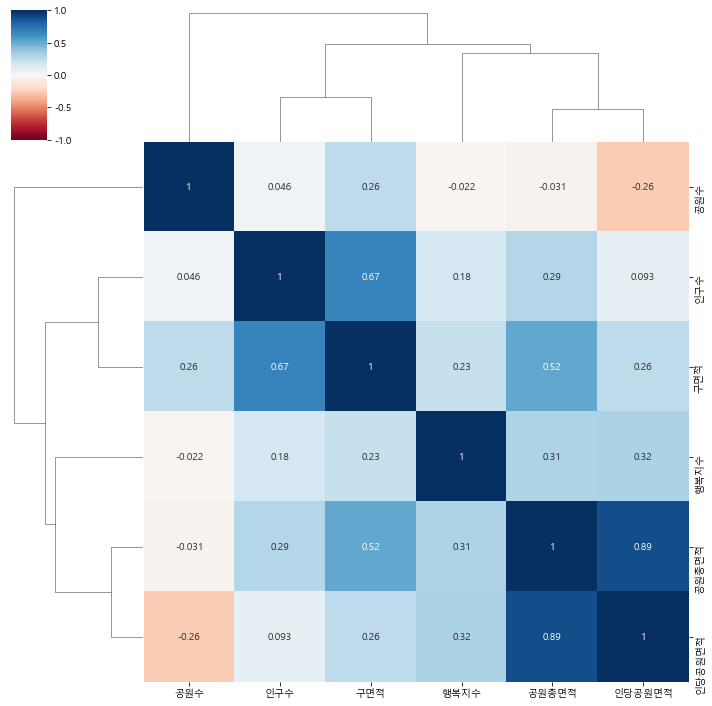

In [147]:
sns.clustermap(df_corr, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.show()

#### 행복지수와 다른 요소들은 상관관계가 크지 않지만 그나마 공원총면적과 인당공원면적과 상관관계가 있는 것을 볼 수 있습니다.